In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.who.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-20,282
2020-01-21,314
2020-01-22,579
2020-01-23,581
2020-01-24,846


In [4]:
data.tail()

,infected
date,
2020-03-04,93091
2020-03-05,95324
2020-03-06,98192
2020-03-07,101927
2020-03-08,105586


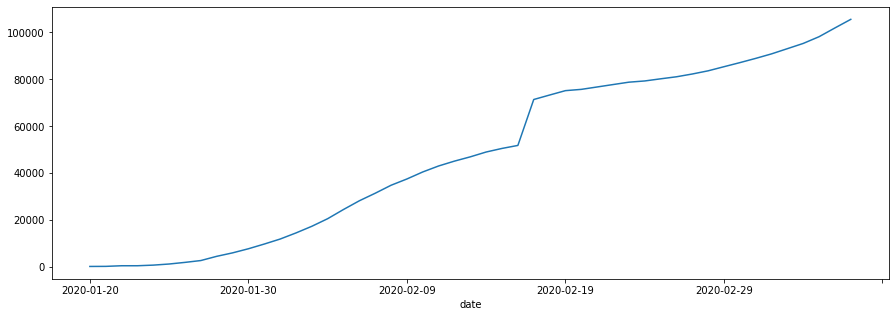

In [5]:
data.infected.plot(figsize=(15, 5))

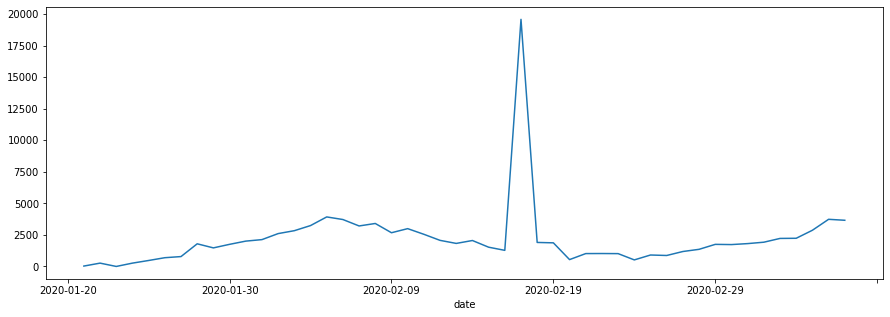

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=900.016, BIC=903.758, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0); AIC=901.713, BIC=907.327, Fit time=0.281 seconds
Fit ARIMA: order=(0, 1, 1); AIC=901.750, BIC=907.363, Fit time=0.077 seconds
Fit ARIMA: order=(1, 1, 1); AIC=904.033, BIC=911.518, Fit time=0.949 seconds
Total fit time: 2.090 seconds


In [9]:
stepwise_model.aic()

900.0156530349296

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 60
firstPredictionDay = datetime.datetime(2020,3,9)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-09 - 107779
2020-03-10 - 109973
2020-03-11 - 112167
2020-03-12 - 114361
2020-03-13 - 116555
2020-03-14 - 118748
2020-03-15 - 120942
2020-03-16 - 123136
2020-03-17 - 125330
2020-03-18 - 127524
2020-03-19 - 129718
2020-03-20 - 131911
2020-03-21 - 134105
2020-03-22 - 136299
2020-03-23 - 138493
2020-03-24 - 140687
2020-03-25 - 142881
2020-03-26 - 145075
2020-03-27 - 147268
2020-03-28 - 149462
2020-03-29 - 151656
2020-03-30 - 153850
2020-03-31 - 156044
2020-04-01 - 158238
2020-04-02 - 160431
2020-04-03 - 162625
2020-04-04 - 164819
2020-04-05 - 167013
2020-04-06 - 169207
2020-04-07 - 171401
2020-04-08 - 173594
2020-04-09 - 175788
2020-04-10 - 177982
2020-04-11 - 180176
2020-04-12 - 182370
2020-04-13 - 184564
2020-04-14 - 186757
2020-04-15 - 188951
2020-04-16 - 191145
2020-04-17 - 193339
2020-04-18 - 195533
2020-04-19 - 197727
2020-04-20 - 199920
2020-04-21 - 202114
2020-04-22 - 204308
2020-04-23 - 206502
2020-04-24 - 208696
2020-04-25 - 210890
2020-04-26 - 213083
2020-04-27 - 215277
